In [1]:
from johnson import *

In [97]:
from pprint import pprint
data=get_db_data('_wimsatt')
data['author'] = [x.split('.')[0] for x in data.index]
data['title'] = [x.split('.')[1] for x in data.index]
# pprint(dict(data[data.word_beg.str.contains('amplifications')].iloc[0]))
cols=[
    
    'sent_num', 
    'plen', 
    'word_beg', 
    'word_mid', 
    'word_end', 
    'pos_beg',
    'pos_mid', 
    'pos_end', 
    'is_valid', 
    'author', 
    'title',
    'sent',    
]
data=data[cols].reset_index()
data

100%|██████████| 9/9 [00:00<00:00, 1890.37it/s]


,id,sent_num,plen,word_beg,word_mid,word_end,pos_beg,pos_mid,pos_end,is_valid,author,title,sent
0,Addison.Spectator106,2,1,the Gentlemen,of,the Country,DET PROPN,ADP,DET PROPN,True,Addison,Spectator106,When the Gentlemen of the Country come to see ...
1,Addison.Spectator106,5,1,Care,and,Tenderness,PROPN,CCONJ,PROPN,True,Addison,Spectator106,You see the Goodness of the Master even in the...
2,Addison.Spectator106,8,4,a Mixture of the Father,and,the Master of the Family,DET PROPN ADP DET PROPN,CCONJ,DET PROPN ADP DET PROPN,True,Addison,Spectator106,"At the same time the good old Knight, with a M..."
3,Addison.Spectator106,8,1,the Master,of,the Family,DET PROPN,ADP,DET PROPN,True,Addison,Spectator106,"At the same time the good old Knight, with a M..."
4,Addison.Spectator106,9,0,any,of,them,PRON,ADP,PRON,True,Addison,Spectator106,This Humanity and good Nature engages every Bo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,Addison.Spectator177,21,1,it the Property,of,others,PRON DET PROPN,ADP,NOUN,True,Addison,Spectator177,"By these means he is generous, without impover..."
399,Addison.Spectator177,22,1,Prejudice,to,their Families,PROPN,ADP,PRON NOUN,True,Addison,Spectator177,There are few Men so cramped in their private ...
400,Addison.Spectator177,23,1,a Diversion,or,Convenience,DET NOUN,CCONJ,PROPN,True,Addison,Spectator177,It is but sometimes sacrificing a Diversion or...
401,Addison.Spectator177,24,1,prudent,and,convenient,ADJ,CCONJ,ADJ,True,Addison,Spectator177,"This is, I think, not only the most prudent an..."


In [101]:
data.query('plen>0').groupby(['author','plen']).sample(1).set_index(['author','plen']).sort_index()[['word_beg','word_mid','word_end','pos_beg']]

word_beg word_mid  \
author  plen                                                    
Addison 1                                    the Use       of   
        2                            a regular Pulse       or   
        3                               at all Times      and   
        4                    a Mixture of the Father      and   
        7     Secondly It should be an entire Action      and   
Hazlitt 1                                 refinement       of   
        2                           the golden light       of   
        3                           amused his fancy      and   
        4                  the pursuit of new scenes      and   
        5               the breaking of a flower pot       or   
Johnson 1                              the judgement       of   
        2                          a hearty adherent       to   
        3                    her catharticks of vice       or   

                                         word_end  \
author  plen                                        
Addison 1                                the Poor   
        2                        a good Digestion   
        3                          in every Place   
        4                the Master of the Family   
        7     Thirdly It should be a great Action   
Hazlitt 1                               sentiment   
        2                             other years   
        3                 exercised his ingenuity   
        4             thoughts of distant friends   
        5                 the fall of a china jar   
Johnson 1                                  Dryden   
        2               the present establishment   
        3                    lenitives of passion   

                                    pos_beg  
author  plen                                 
Addison 1                         DET PROPN  
        2                     DET ADJ PROPN  
        3                     ADP DET PROPN  
        4           DET PROPN ADP DET PROPN  
        7     ADV PRON AUX AUX DET ADJ NOUN  
Hazlitt 1                              NOUN  
        2                      DET ADJ NOUN  
        3                    VERB PRON NOUN  
        4             DET NOUN ADP ADJ NOUN  
        5        DET NOUN ADP DET NOUN NOUN  
Johnson 1                          DET NOUN  
        2                      DET ADJ NOUN  
        3                PRON NOUN ADP NOUN

In [92]:
pprint(dict(data.query('plen>2').set_index(['author','plen','sent_num']).sort_index().iloc[-1]))

{'is_valid': True,
 'pos_beg': 'PRON NOUN ADP NOUN',
 'pos_end': 'NOUN ADP NOUN',
 'pos_mid': 'CCONJ',
 'sent': 'Those who have proceeded so far as to appeal to the tribunal of '
         'succeeding times are not likely to be cured of their infatuation, '
         'but all endeavours ought to be used for the prevention of a disease, '
         'for which, when it has attained its height, perhaps no remedy will '
         'be found in the gardens of philosophy, however she may boast her '
         'physick of the mind, her catharticks of vice, or lenitives of '
         'passion.',
 'title': 'Rambler2',
 'word_beg': 'her catharticks of vice',
 'word_end': 'lenitives of passion',
 'word_mid': 'or'}


In [29]:
# pprint(dict(data[data.word_end.str.contains('same sort')].iloc[0]))

In [30]:
norms=get_allnorms()['Abs-Conc.Median.C18'].dropna()
norms=norms.loc[norms.index.dropna()]
norms_d = dict(norms)

In [47]:
def unpack_parallel_long(xyz):
    x, y, z = xyz
    words = (tuple(a[0] for a in x), y[0], tuple(b[0] for b in z))
    pos = (tuple(a[1] for a in x), y[1], tuple(b[1] for b in z))
    words_flat = tuple(list(words[0]) + [words[1]] + list(words[2]))
    is_valid = not all(w == w.upper() for w in words_flat)
    if not is_valid: return []

    plen = min(
        [
            len(remove_opening_determiners(pos[0])),
            len(remove_opening_determiners(pos[-1])),
        ]
    )
    midword = words[1]  # .lower()
    # if midword=='&': midword='and'

    o=[]
    wi=0
    for w,p in zip(words[0], pos[0]):
        wi+=1
        odx={'word_num':wi, 'word':w, 'pos':p, 'word_type':'beg'}
        o.append(odx)
    
    wi+=1
    odx={'word_num':wi, 'word':words[1], 'pos':pos[1], 'word_type':'mid'}
    o.append(odx)

    for w,p in zip(words[-1], pos[-1]):
        wi+=1
        odx={'word_num':wi, 'word':w, 'pos':p, 'word_type':'end'}
        o.append(odx)

    return [{**d, 'plen':plen} for d in o]


def get_db_data_long(suffix=""):
    db = get_db(flag="r", suffix=suffix)
    o = []
    for key in tqdm(db.keys(), total=len(db)):
        for sent_num, sent, sent_parallels in db[key]:
            for pi,paral in enumerate(sent_parallels):
                for wdat in unpack_parallel_long(paral):
                    o.append({"id": key, "sent_num": sent_num, "paral_num":pi, **wdat})
    return pd.DataFrame(o)


In [65]:
df=get_db_data_long('_wimsatt')
df['author']=df['id'].apply(lambda x: x.split('.')[0])
df['title']=df['id'].apply(lambda x: x.split('.')[1])

def get_absconc(word,pos, default=0):
    if pos not in {'NOUN','ADP','PROPN','ADJ','VERB','ADV'}:
        return default
    w=word.lower()
    return norms_d.get(w,default)


df['absconc'] = [-1*get_absconc(w,p) for w,p in zip(df.word, df.pos)]

100%|██████████| 9/9 [00:00<00:00, 1658.70it/s]


In [78]:
import plotnine as p9
groups = [gdf for g,gdf in df.query('plen>2').groupby(['author','title','sent_num','paral_num'])]
gdf = random.choice(groups)
gdf

,id,sent_num,paral_num,word_num,word,pos,word_type,plen,author,title,absconc
668,Hazlitt.DrydenAndPope,27,5,1,the,DET,beg,5,Hazlitt,DrydenAndPope,0.000000
669,Hazlitt.DrydenAndPope,27,5,2,breaking,NOUN,beg,5,Hazlitt,DrydenAndPope,-0.026232
670,Hazlitt.DrydenAndPope,27,5,3,of,ADP,beg,5,Hazlitt,DrydenAndPope,0.000000
671,Hazlitt.DrydenAndPope,27,5,4,a,DET,beg,5,Hazlitt,DrydenAndPope,0.000000
672,Hazlitt.DrydenAndPope,27,5,5,flower,NOUN,beg,5,Hazlitt,DrydenAndPope,-1.473014
673,Hazlitt.DrydenAndPope,27,5,6,pot,NOUN,beg,5,Hazlitt,DrydenAndPope,-1.959201
674,Hazlitt.DrydenAndPope,27,5,7,or,CCONJ,mid,5,Hazlitt,DrydenAndPope,0.000000
675,Hazlitt.DrydenAndPope,27,5,8,the,DET,end,5,Hazlitt,DrydenAndPope,0.000000
676,Hazlitt.DrydenAndPope,27,5,9,fall,NOUN,end,5,Hazlitt,DrydenAndPope,0.123148
677,Hazlitt.DrydenAndPope,27,5,10,of,ADP,end,5,Hazlitt,DrydenAndPope,0.000000


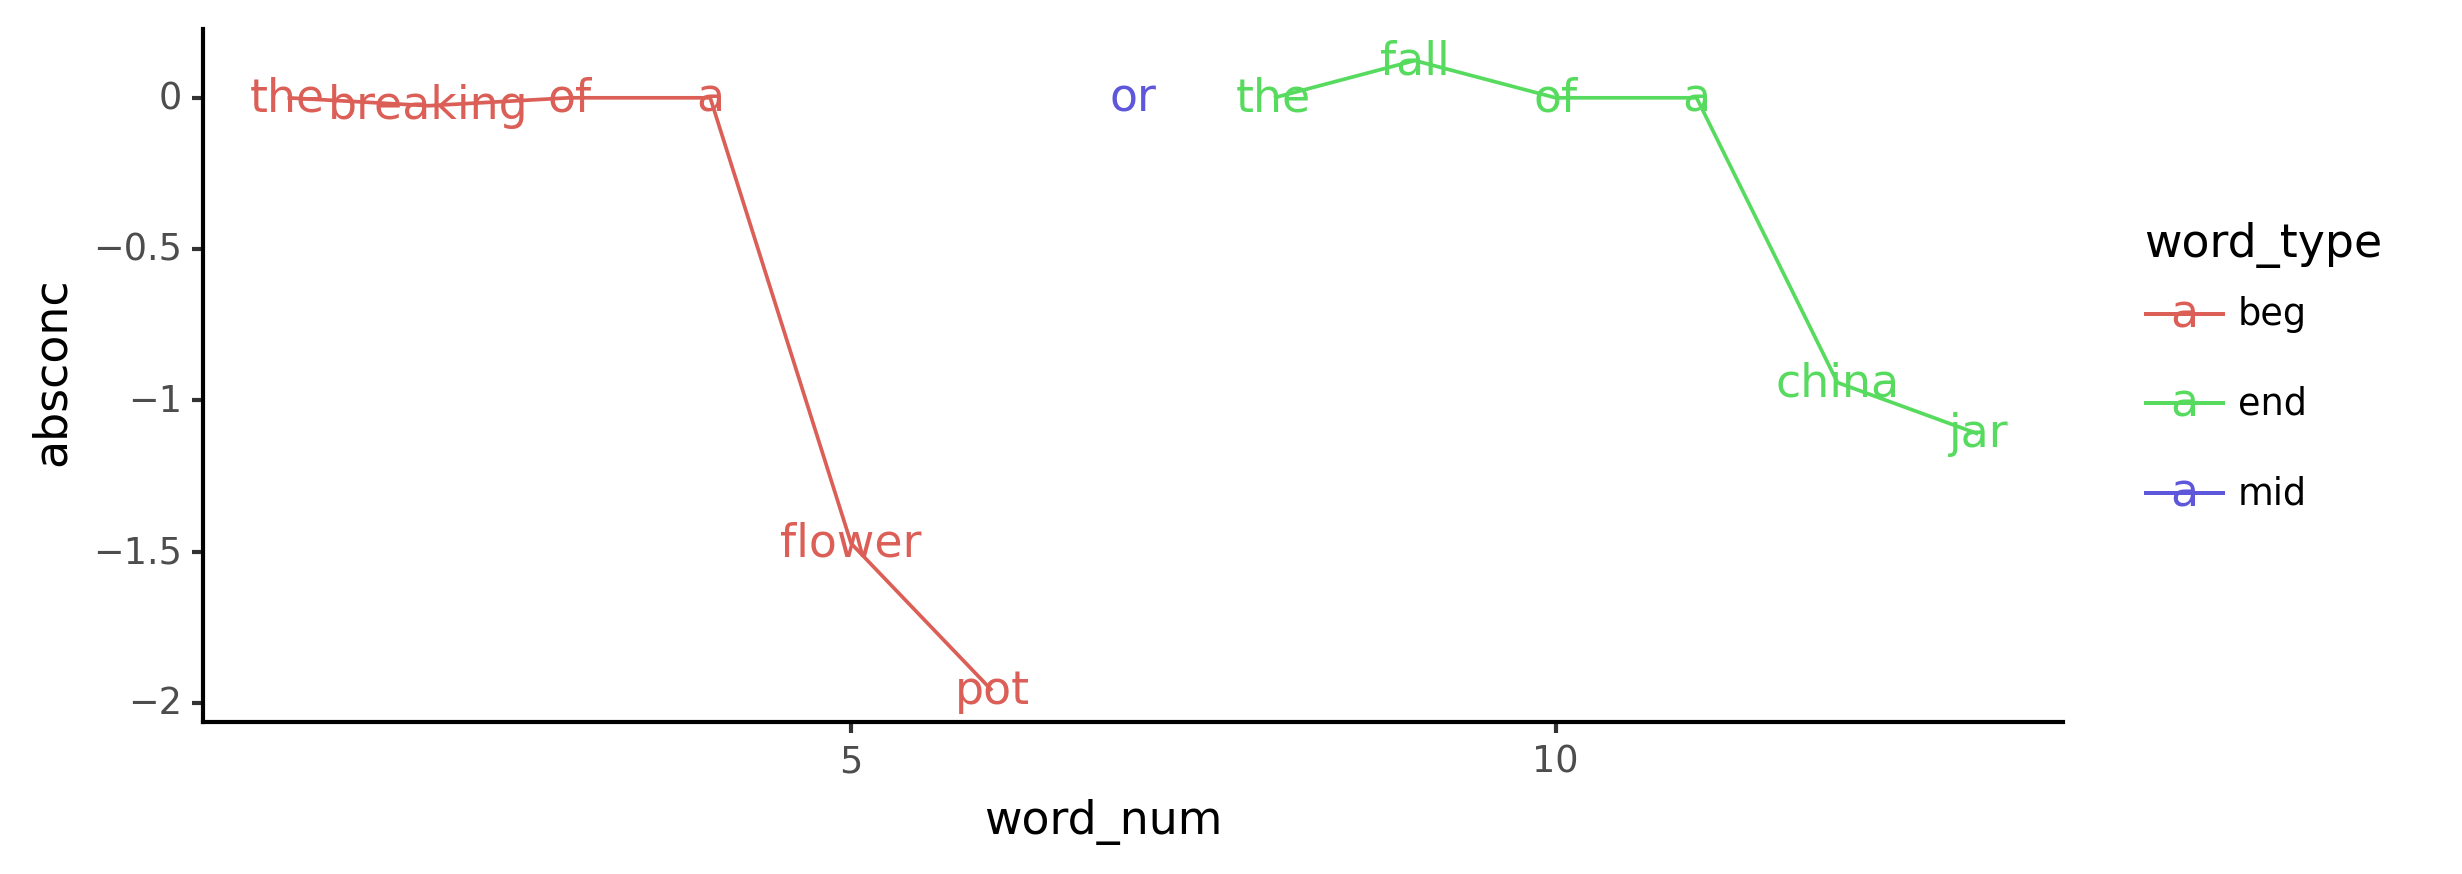

<ggplot: (718007983)>

In [84]:
p9.options.figure_size=8,3
fig=p9.ggplot(gdf, p9.aes(x='word_num', y='absconc', label='word', color='word_type'))
fig+=p9.theme_classic()
fig+=p9.geom_line()
fig+=p9.geom_text()
fig